In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

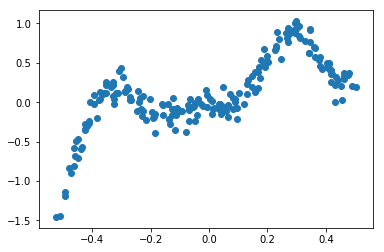

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

In [18]:
import mylibrary.nnlib as tnn

In [54]:
n_hidden=1
optimizer = tnn.Adam()
la1 = tnn.NonLinearLayer(1, n_hidden, activation=tnn.Relu(), optimizer=optimizer)
la2 = tnn.LinearLayer(n_hidden, 1,optimizer=optimizer)
la2.weights = np.zeros_like(la2.weights)

resblock = tnn.AutoForm()
resblock.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    resout = resblock.forward(x_data)
    a1 = resout+x_data
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    
    dx = resblock.backward(dy)
#     dx = dx + dy
    
    resblock.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.056717742810056176

_______________________
epoch 100
Loss 0.04541190581434426

_______________________
epoch 200
Loss 0.03863941532869477

_______________________
epoch 300
Loss 0.03645622429106118

_______________________
epoch 400
Loss 0.035896530764835136

_______________________
epoch 500
Loss 0.035818884879730645

_______________________
epoch 600
Loss 0.035806315217346486

_______________________
epoch 700
Loss 0.0358006052499948

_______________________
epoch 800
Loss 0.03579950114559055

_______________________
epoch 900
Loss 0.0357994021770494

_______________________
epoch 1000
Loss 0.035799395602975244

_______________________
epoch 1100
Loss 0.03579939527807545

_______________________
epoch 1200
Loss 0.03579939526623982

_______________________
epoch 1300
Loss 0.03579939526592729

_______________________
epoch 1400
Loss 0.03579939526592144

_______________________
epoch 1500
Loss 0.03579939526592137

_______________________
epoch 160

TclError: this isn't a Tk application

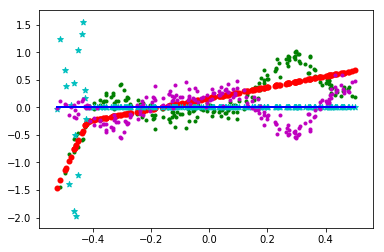

In [56]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

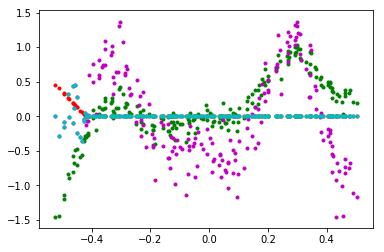

In [64]:
# Layer1 output
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, la1.output, marker='.', c='r', label='x,a1')
plt.scatter(x, la1.del_output, marker='.', c='m', label='x,dl1')
plt.scatter(x, la1.del_zee, marker='.', c='c', label='x,dz1')

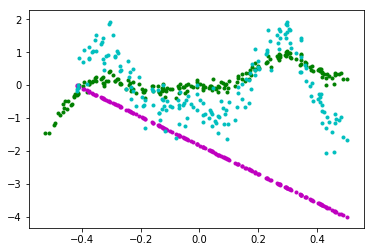

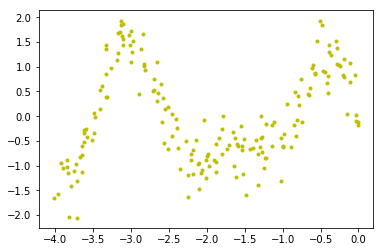

In [82]:
# Layer1 del_output
mask = la1.zee < 0
zerod_x = la1.zee[mask]
zerod_da = (la1.del_output - la2.del_zee)[mask]

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x[mask.reshape(-1)], zerod_x, marker='.', c='m', label='x,zerodx')
plt.scatter(x[mask.reshape(-1)], zerod_da, marker='.', c='c', label='x,zerod_da')
plt.show()
plt.scatter(zerod_x, zerod_da, marker='.', c='y', label='x,zerod_da')

In [75]:
zerod_da.mean()

-6.148449691091277e-12

## Seems, MLP with 2 layers works with zero weight initialization in 2nd layer

In [50]:
n_hidden=1
optimizer = tnn.Adam()
la1 = tnn.NonLinearLayer(1, n_hidden, activation=tnn.Relu(), optimizer=optimizer)
la2 = tnn.LinearLayer(n_hidden, 1,optimizer=optimizer)
la2.weights = np.zeros_like(la2.weights)

net1 = tnn.AutoForm()
net1.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = net1.forward(x_data)
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = net1.backward(dy)
    
    net1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.10641933039503862

_______________________
epoch 10
Loss 0.09281482413855337

_______________________
epoch 20
Loss 0.08117030827984255

_______________________
epoch 30
Loss 0.06826153190472749

_______________________
epoch 40
Loss 0.057129134910591975

_______________________
epoch 50
Loss 0.04941831120469422

_______________________
epoch 60
Loss 0.04517195781100993

_______________________
epoch 70
Loss 0.043633970263981026

_______________________
epoch 80
Loss 0.043339986189333504

_______________________
epoch 90
Loss 0.04335426288724272

_______________________
epoch 100
Loss 0.0433576910487059

_______________________
epoch 110
Loss 0.04334288228678698

_______________________
epoch 120
Loss 0.04333410316748841

_______________________
epoch 130
Loss 0.04333168639891816

_______________________
epoch 140
Loss 0.043331312014604544

_______________________
epoch 150
Loss 0.04333118122668203

_______________________
epoch 160
Loss 0.0433310


_______________________
epoch 1370
Loss 0.04333102874186071

_______________________
epoch 1380
Loss 0.04333111329637001

_______________________
epoch 1390
Loss 0.043331127800485626

_______________________
epoch 1400
Loss 0.04333097469421407

_______________________
epoch 1410
Loss 0.04333115428498705

_______________________
epoch 1420
Loss 0.043331269318536064

_______________________
epoch 1430
Loss 0.04333109197276414

_______________________
epoch 1440
Loss 0.04333111849847209

_______________________
epoch 1450
Loss 0.04333111002108713

_______________________
epoch 1460
Loss 0.043330980432148954

_______________________
epoch 1470
Loss 0.04333124766817779

_______________________
epoch 1480
Loss 0.0433309447719118

_______________________
epoch 1490
Loss 0.04333126632688015

_______________________
epoch 1500
Loss 0.04333134698092453

_______________________
epoch 1510
Loss 0.0433311185157387

_______________________
epoch 1520
Loss 0.043331255634883485

_____________________


_______________________
epoch 2720
Loss 0.043331596307846186

_______________________
epoch 2730
Loss 0.04333138308559823

_______________________
epoch 2740
Loss 0.04333218921673156

_______________________
epoch 2750
Loss 0.0433324522566501

_______________________
epoch 2760
Loss 0.04333242012569384

_______________________
epoch 2770
Loss 0.043332492445941

_______________________
epoch 2780
Loss 0.043331651918516095

_______________________
epoch 2790
Loss 0.043330964600214114

_______________________
epoch 2800
Loss 0.043331442381188336

_______________________
epoch 2810
Loss 0.043331077610952035

_______________________
epoch 2820
Loss 0.04333127541247151

_______________________
epoch 2830
Loss 0.04333098026786579

_______________________
epoch 2840
Loss 0.04333121592020153

_______________________
epoch 2850
Loss 0.043331644914054904

_______________________
epoch 2860
Loss 0.04333099496878359

_______________________
epoch 2870
Loss 0.04333131226609416

____________________


_______________________
epoch 4060
Loss 0.04333112209004954

_______________________
epoch 4070
Loss 0.04333117882341234

_______________________
epoch 4080
Loss 0.04333119426802731

_______________________
epoch 4090
Loss 0.043331668458862965

_______________________
epoch 4100
Loss 0.04333317306769411

_______________________
epoch 4110
Loss 0.043332057260830135

_______________________
epoch 4120
Loss 0.043332193255140546

_______________________
epoch 4130
Loss 0.04333232905811691

_______________________
epoch 4140
Loss 0.043331171181700975

_______________________
epoch 4150
Loss 0.043331512607833945

_______________________
epoch 4160
Loss 0.043331289101685926

_______________________
epoch 4170
Loss 0.04333303118997188

_______________________
epoch 4180
Loss 0.04333199360852622

_______________________
epoch 4190
Loss 0.04333219174811781

_______________________
epoch 4200
Loss 0.043331166391535385

_______________________
epoch 4210
Loss 0.043331876139656604

_______________

TclError: this isn't a Tk application

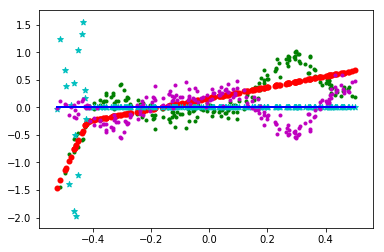

In [83]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

In [ ]:
## Works